In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
import numpy as np
import requests
import io
from PIL import Image
import time
import cv2

In [3]:
def plot_image(img):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img);

In [30]:
url = 'http://localhost:8000'

In [9]:
# image_path = 'api-use/source.png'
image_path = 'data/raw/AM_cropped_Rho.png'

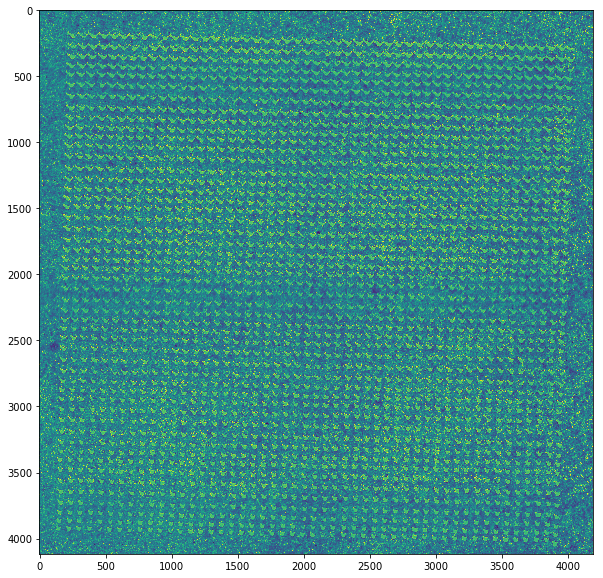

In [12]:
image = cv2.imread(image_path)[:,:,0]
plot_image(image)

In [14]:
image.shape

(4116, 4190)

In [20]:
resp = requests.post(url + '/tasks',
                     data=io.open(image_path, 'rb'),
                     headers={'Content-Type': 'image/png'})

In [21]:
task_uri = resp.headers['location']
task_id = task_uri.split('/')[-1]
task_id

'5625d1fb-ba38-4517-b020-ce4d1e05e24e'

In [29]:
while True:
    resp = requests.get(url + task_uri)
    status = resp.json().get('status', None)
    if status == 'FAILED':
        raise Exception(status)
    if status == 'FINISHED':
        break
    else:
        print('.', end='')
        time.sleep(1)
resp.json()

{'status': 'FINISHED'}

In [25]:
resp = requests.get(f'{url}/masks/{task_id}')
mask = np.array(Image.open(io.BytesIO(resp.content)))

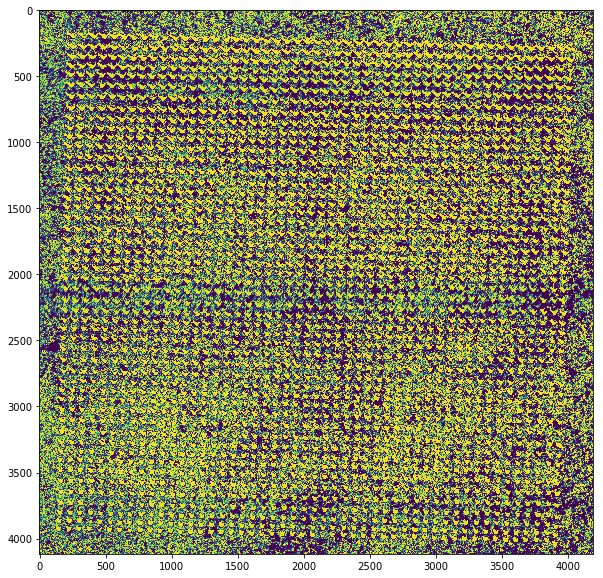

In [26]:
plot_image(mask)

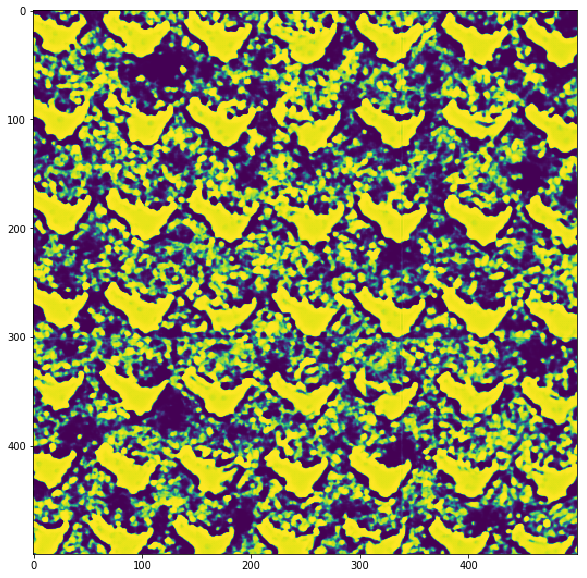

In [27]:
plot_image(mask[1500:2000,1500:2000])